In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [3]:
import sys,os,glob
sys.path.insert(0,'../python/')

In [4]:
import athena_read
import xarray as xr

In [5]:
plt.rcParams['figure.dpi']=200

# running the example

```
$ ./configure.py --prob=particle_turb -p -mpi -hdf5 -fft
$ make all -j
$ cd bin/
$ mpirun -np 4 ./athena -i ../inputs/athinput.particle_turb
```

# preparing outputs
```
$ ../vis/tab/combine_partab.sh pTurb out3 par0
$ ../vis/tab/combine_partab.sh pTurb out3 par1
$ rm pTurb.block*.tab
```

# dependency (for this notebook)
```
$ conda install xarray pandas
```

# projected density time series from hdf5 outputs 

In [6]:
# find file list

base = '../..//bin/'
pid = 'pTurb'
hdfnames = glob.glob(base+'{}.out2.?????.athdf'.format(pid))
hdfnames.sort()

In [7]:
# (1) read data using athena_read.athdf, which returns data in dict
# (2) use athdf_to_xarray (new function) to convert it into xarray dataset
# (3) concatenate time series into a single xarray dataset

dlist = []
for f in hdfnames:
    data_dict = athena_read.athdf(f)
    data_dset = athena_read.athdf_to_xarray(data_dict)
    dlist.append(data_dset)
dset = xr.concat(dlist,dim='time')
dset

<xarray.Dataset>
Dimensions:  (time: 6, x: 32, y: 32, z: 32)
Coordinates:
  * x        (x) float32 -0.484375 -0.453125 -0.421875 ... 0.453125 0.484375
  * z        (z) float32 -0.484375 -0.453125 -0.421875 ... 0.453125 0.484375
  * y        (y) float32 -0.484375 -0.453125 -0.421875 ... 0.453125 0.484375
  * time     (time) float64 0.0 0.1005 0.2005 0.3004 0.4002 0.5
Data variables:
    rho      (time, z, y, x) float32 1.0 1.0 1.0 ... 0.7899765 0.79141045
    press    (time, z, y, x) float32 0.6666667 0.6666667 ... 4.2066464 4.248836
    vel1     (time, z, y, x) float32 -2.6328387 -2.3582726 ... -0.19144368
    vel2     (time, z, y, x) float32 -0.9730023 -1.1554368 ... 0.8614249
    vel3     (time, z, y, x) float32 -0.48874813 -0.050837293 ... 0.577062
    vp01     (time, z, y, x) float32 0.0 0.0 0.0 ... -0.31393102 -0.23731634
    vp02     (time, z, y, x) float32 0.0 0.0 0.0 ... 0.54831547 0.8784601
    vp03     (time, z, y, x) float32 0.0 0.0 0.0 ... 0.9266759 0.58116436
    vp11     (time, z, y, x) float32 0.0 0.0 0.0 ... -0.28310376 -0.26322147
    vp12     (time, z, y, x) float32 0.0 0.0 0.0 ... 0.4404633 0.7529008
    vp13     (time, z, y, x) float32 0.0 0.0 0.0 ... 0.98735946 0.70865846
    rhop0    (time, z, y, x) float32 0.826733 0.9929769 ... 0.54656863 0.6773579
    rhop1    (time, z, y, x) float32 0.16616562 0.0 0.0 ... 0.3880067 0.11570493
Attributes:
    Coordinates:    b'cartesian'
    DatasetNames:   [b'prim']
    MaxLevel:       0
    MeshBlockSize:  [16 16 16]
    NumCycles:      0
    NumMeshBlocks:  8
    NumVariables:   [13]
    RootGridSize:   [32 32 32]
    RootGridX1:     [-0.5  0.5  1. ]
    RootGridX2:     [-0.5  0.5  1. ]
    RootGridX3:     [-0.5  0.5  1. ]
    Time:           0.0
    VariableNames:  [b'rho' b'press' b'vel1' b'vel2' b'vel3' b'vp01' b'vp02' ...
    x1f:            [-0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0...
    x2f:            [-0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0...
    x3f:            [-0.5     -0.46875 -0.4375  -0.40625 -0.375   -0.34375 -0...

In [8]:
# create total tracer particle density field

dset['rhop']=dset['rhop0']+dset['rhop1']

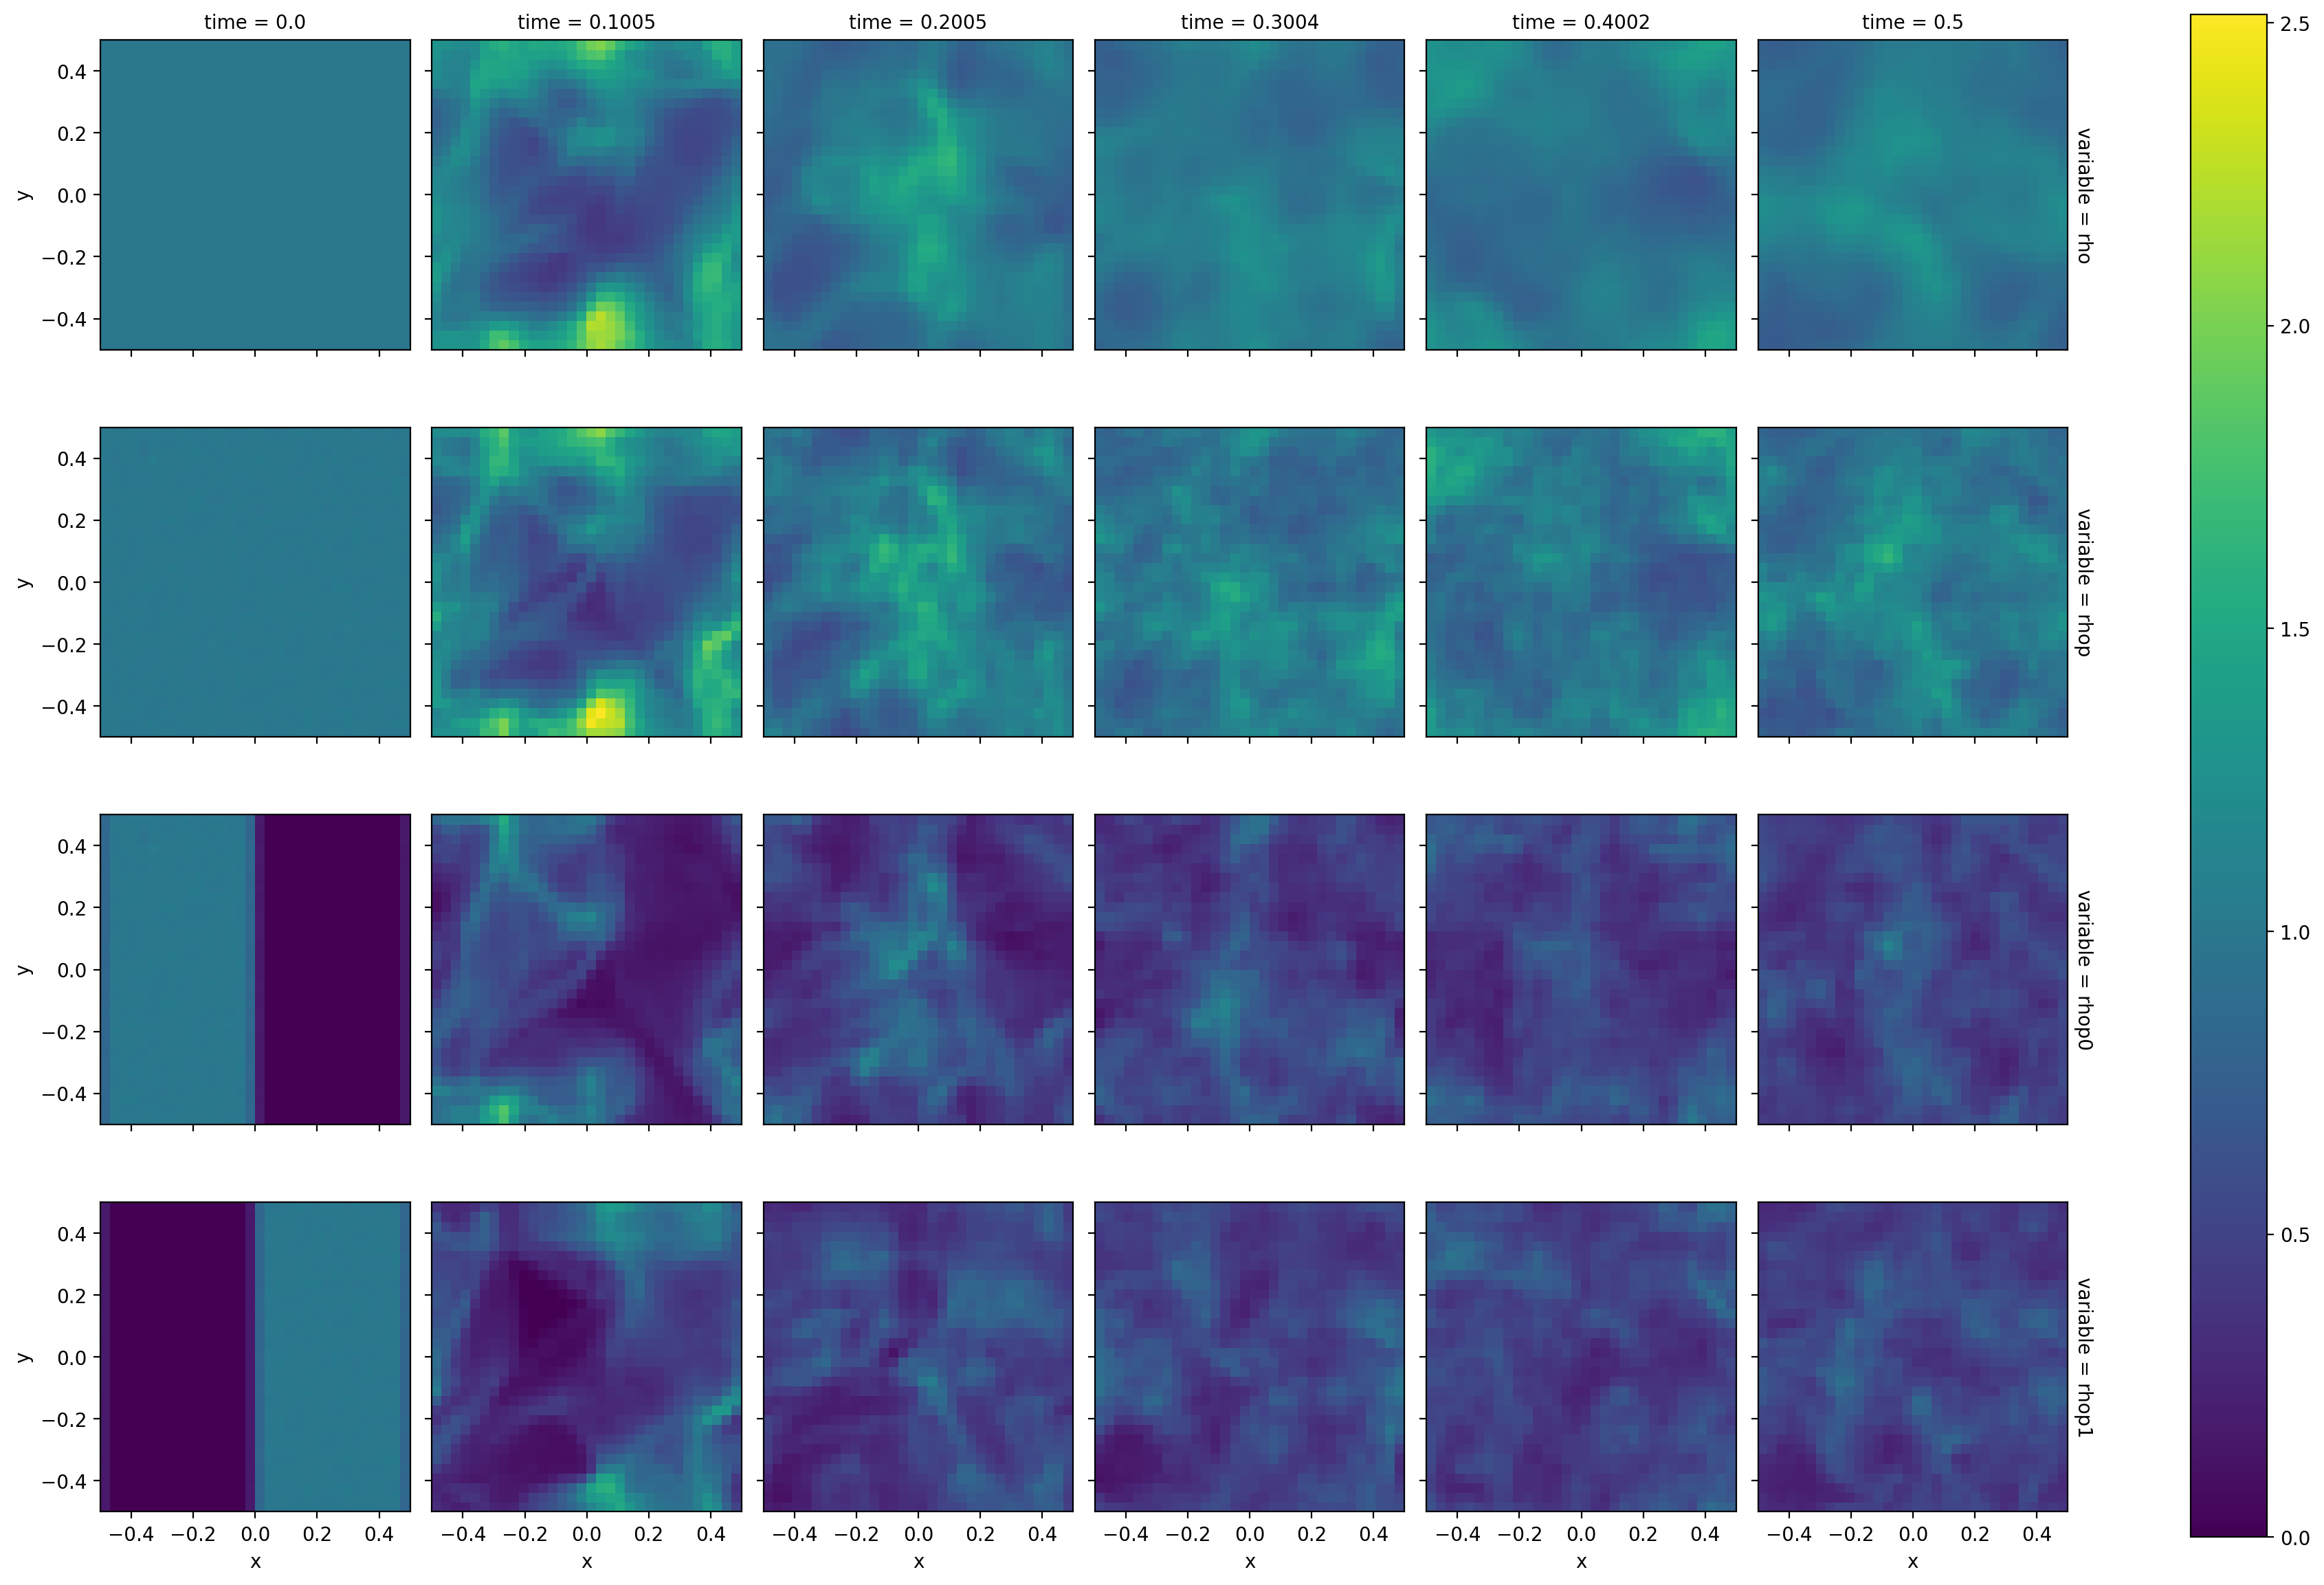

In [9]:
# plot

g=dset[['rho','rhop','rhop0','rhop1']].to_array().mean(dim='z').plot(row='variable',col='time')
plt.setp(g.axes,'aspect','equal');

# full particle distribution from partab outputs 

In [10]:
# read-in combined partab file generated by the script above

itime = 5
tab0name = base+'{}.out3.{:05d}.par0.tab'.format(pid,itime)
tab1name = base+'{}.out3.{:05d}.par1.tab'.format(pid,itime)

In [11]:
# read (internally it uses pandas and returns pandas dataframe)

par0 = athena_read.partab(tab0name)
par1 = athena_read.partab(tab1name)

par0

,pid,x1,x2,x3,v1,v2,v3
0,1,0.082014,0.443754,-0.111336,0.313056,0.540913,1.380575
1,2,0.036143,-0.499575,-0.403295,1.089297,0.345072,-0.652328
2,3,-0.082530,0.461276,0.415952,-0.181735,0.882233,-1.083492
3,4,-0.041598,0.352225,-0.486120,-0.130013,0.141013,-0.975458
4,5,-0.014776,0.202800,-0.292984,0.314024,-0.710914,0.490945
...,...,...,...,...,...,...,...
131067,131068,-0.076609,-0.291971,0.072293,0.372423,-0.626648,0.467163
131068,131069,0.015719,0.091180,0.028321,0.484045,-0.420778,0.446867
131069,131070,-0.188262,0.210240,0.429470,-1.173199,0.316801,-0.745420
131070,131071,-0.034623,0.139121,-0.147349,0.260034,-0.479498,0.776068


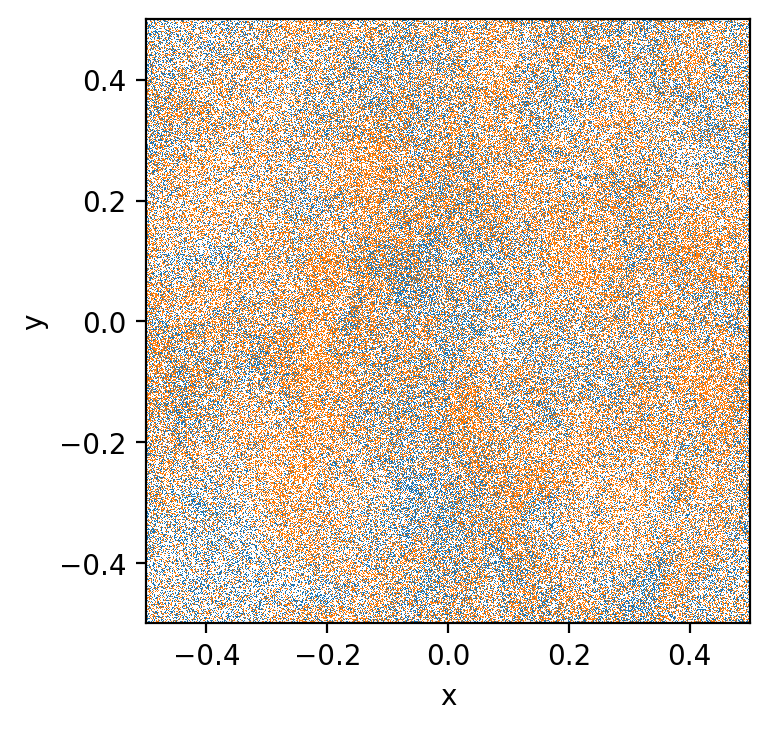

In [12]:
plt.plot(par0['x1'],par0['x2'],',')
plt.plot(par1['x1'],par1['x2'],',')
plt.xlim(-0.5,0.5)
plt.ylim(-0.5,0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.gca().set_aspect('equal')